# Capstone Webscrapping using BeautifulSoup

This notebook contains the capstone project of Webscraping by using one of the Python libraries called `beautifulSoup4` and created by Aditya Adhrevi

**BACKGROUND**

This project is due to one of the requirements in passing Data Analytics with Python courses of Fullstack Data Science program by [Algorit.ma](https://algorit.ma/). Within this project, a web scrapping approach is used to extract data from a website. The website that is used is [IMDB](imdb.com/search/title/?release_date=2019-01-01,2019-12-31) and the data to be extracted are movies from year 2019 with the limitation of 5 web pages. 

**Dependencies:**

- beautifulSoup4
- pandas
- flask
- matplotlib

## Importing Library

To initiate the project, several libraries are imported. 

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from time import sleep # this is optional
from random import randint # this is optional

Within the project, the required libraries are `pandas`, `requests`, and `BeautifulSoup`. The function of these libraries are described as follows:

 - `pandas`       : to manipulate data and performing visualisation 
 - `requests`     : to get the request of a website server
 - `BeatifulSoup` : to parsing the website html and extracting the data
 
Note that the other two packages (`time` and `random`) are optional as this would be used in the project to mantain and avoid crash in perfoming `for` iterations which would be described in the next chapter.

## Initiation of the Web scrapping process

As the web scrapping process would be done in several iterations, first thing to be done is to observe how many data records within a page. In the webpage, the amount of data records are 50 movies for each page. The range of itterations is defined in `pages` variable. Afterwards, the tuple for `movie_data` is created to temporarily store the data before the conversion to DataFrame.

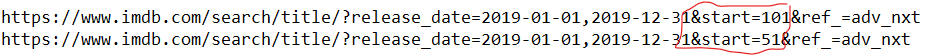

Notice that each of every pages only has a change within `&start=` parameters in the url. Thus, the `request` of the url web page would be modified by adding `str()` function to the parameter for each `page` is being iterated. Next, the `soup` variable is added within the iteration to get the parser of the html webpages. Likewise, the `items` variable is find all of the 50 records within a webpage. Notice that the  `sleep()` function is used within the `for` loop as to maintan and avoid the code to crash while performing the iterations. 

In [3]:
pages = range(1,250,50) # to define numbers of iteration
movie_data = [] # initiating tuple

for page in pages: # 
    page = requests.get("https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31&start="+str(page)+"&ref_=adv_nxt")
    soup = BeautifulSoup(page.text, 'html.parser')
    items = soup.find_all('div', attrs = {'class':'lister-item mode-advanced'}) #to find all of the contaire
    sleep(randint(2, 8))
    for it in items:
        title = it.find('img')['alt']
        rating = it.find('div', attrs={'class':'inline-block ratings-imdb-rating'})['data-value']
        try : score = it.find('span', attrs={'class':'metascore favorable'}).text.replace('        ','')
        except : score = 0
        vote = it.find('span', attrs={'name':'nv'})['data-value']
        movie_data.append([title, rating, score, vote])

To extract the data from a table content of a data record in the website, another `for` loop is performed within the first loop to extract each of every variables (`title`, `rating`, `score`, and `vote`) that are wanted to be extracted by using `.find()` function from `BeautifulSoup` library. 

Note that within the code, the exception handling (`try` and `except`) are used to avoid errors in extracting the `metascore` data as several movies did not have any metascore within the database which resulting the extraction to have `None` value. This would raise errors if the text data within the html to be extracted as `None` values could not be extracted as text.

Finally, the extracted data are temporarily stored in `movie_data` tuple by using `.append()` function. 

## Creating data frame & Data wrangling

To create the dataframe object within `pandas`, the `.DataFrame()` function is used for the next step. The headers of the dataframe would also be specified within the `columns` parameter within the function.

In [4]:
movie_df = pd.DataFrame(movie_data, columns = ('title', 'imdb_rating', 'metascore','vote'))
movie_df

,title,imdb_rating,metascore,vote
0,Black Summer,6.5,0,24114
1,The Boys,8.7,0,285868
2,Once Upon a Time... in Hollywood,7.6,83,595845
3,The Mandalorian,8.8,0,330713
4,Midsommar,7.1,72,227812
...,...,...,...,...
245,Dokutaa Sutoon,8.2,0,12778
246,Primal,8.7,0,7899
247,Criminal: UK,7.6,0,15724
248,Traces,6.9,0,2984


Also note that the data types in the dataframe requires to be converted as the default types of data after extraction is data object. This would be done after identifying missing and duplicated data.

In [5]:
print('Duplicated Data:', movie_df.duplicated().sum())
print('Missing Data:')
print(movie_df.isna().sum())

Duplicated Data: 0
Missing Data:
title          0
imdb_rating    0
metascore      0
vote           0
dtype: int64


In [6]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
title          250 non-null object
imdb_rating    250 non-null object
metascore      250 non-null object
vote           250 non-null object
dtypes: object(4)
memory usage: 7.9+ KB


To convert the data types of each variables, `.astype()` function is used along with the specification of each data type within the function. The conversions are as below.

In [7]:
movie_df['title'] = movie_df['title'].astype('object')
movie_df['imdb_rating'] = movie_df['imdb_rating'].astype('float')
movie_df[['metascore', 'vote']] = movie_df[['metascore', 'vote']].astype('int') 
movie_df.dtypes

title           object
imdb_rating    float64
metascore        int32
vote             int32
dtype: object

**OPTIONAL**

In [8]:
(movie_df['metascore'] == 0).sum()

189

As seen on the previous code, most of the values in `metascore` variable has 0 value which indicates the missing data within the webpage. Due to the number of 0 value exceed 50% of the whole dataframe. the column could be ignored or dropped.

### Implementing webscrapping to the flask dashboard

The plots that are used within the analysis are two histograms which describe the distribution of data for `imdb_rating` and `voting`. the plots are shown below.

<AxesSubplot:ylabel='Frequency'>

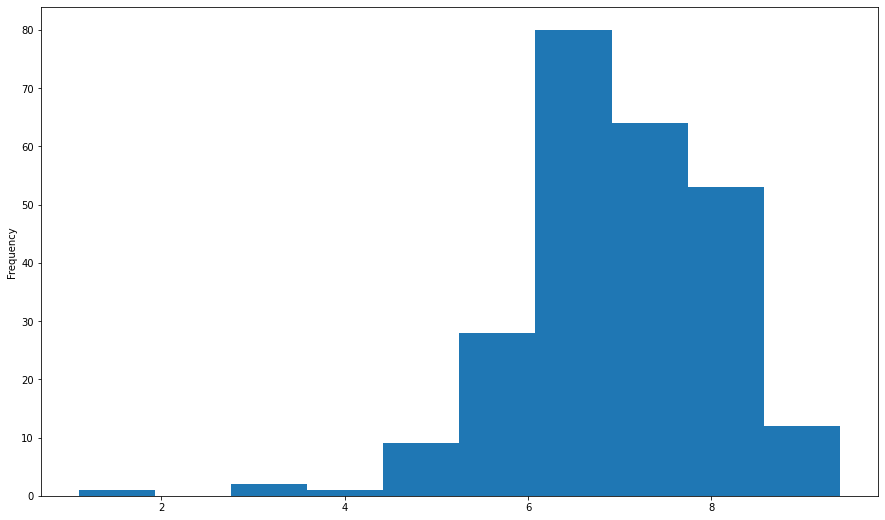

In [9]:
movie_df['imdb_rating'].plot(kind='hist', figsize = (15,9))

<AxesSubplot:ylabel='Frequency'>

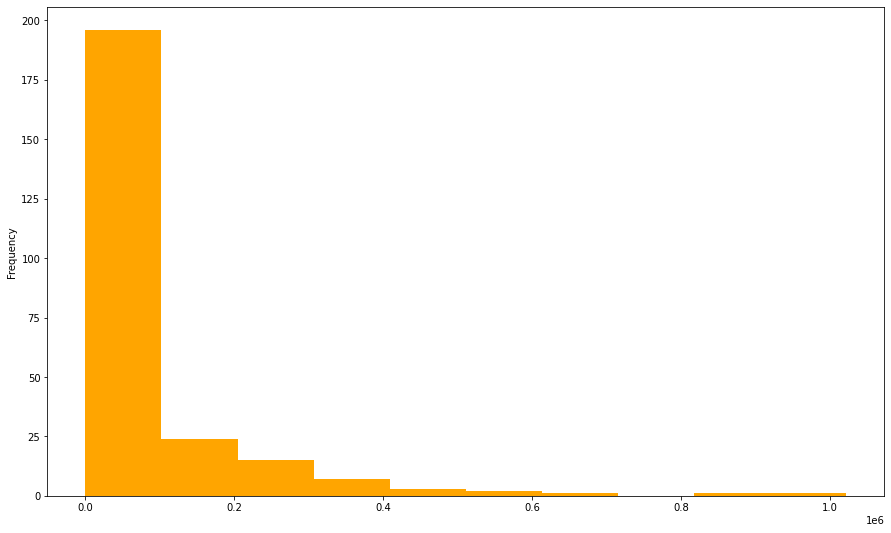

In [11]:
movie_df['vote'].plot(kind='hist', figsize = (15,9), color = 'orange')

Based on the plots above, it is shown that both of the `imdb_rating` and `vote` distributions in 250 data records are skewed which are concentrated approximately 6 to 7 for ratings and approximately 100 thousand votes. The skewed data could also be normalized for several purpose including the machine learning implementation. However, the normalization of the distribution is not within the scope of this project.

Likewise, the plots are implemented on `flask` by executing `app.py` as founded within the directory of this project.

## Final Conclusion 

In summary, web scrapping is a powerful tool to gather data within a webpage (or multiple) that could help to provide data that are accessible through web. This project also demonstrates the data wrangling and visualization process which is also required for exploring the data source at the beginning.

As for the analysis of the data, the skewed distribution would require to be normalized for several purposes such as the implementation of machine learning. This would be an opportunity for further development of this project.

For further information regarding capstone projects, visit [Algorit.ma](https://algorit.ma/) or simply follow and subscribe the youtube channel at this link [Algoritma Data Science School](https://www.youtube.com/channel/UCCix0G-RLoRTenSFEGrQILQ)

~Happy Exploring!